<a href="https://colab.research.google.com/github/afham123/Deep-Learning-Project/blob/main/Practice_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving lending_club_info.csv to lending_club_info.csv


In [4]:
df_info=pd.read_csv('lending_club_info.csv')
df_info

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [5]:
from google.colab import files
uploaded = files.upload()

Saving lending_club_loan_two.csv to lending_club_loan_two.csv


In [6]:
df=pd.read_csv('lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


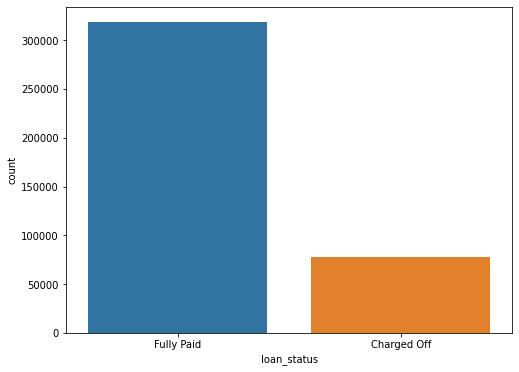

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df['loan_status'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


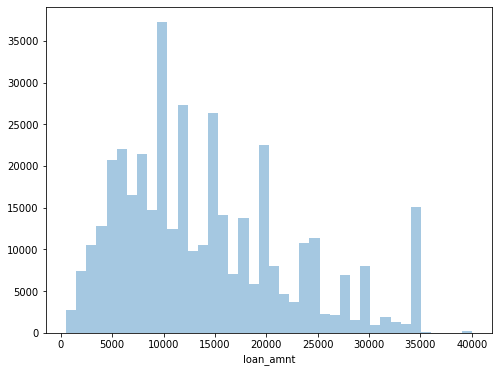

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(df['loan_amnt'],bins=40,kde=False)

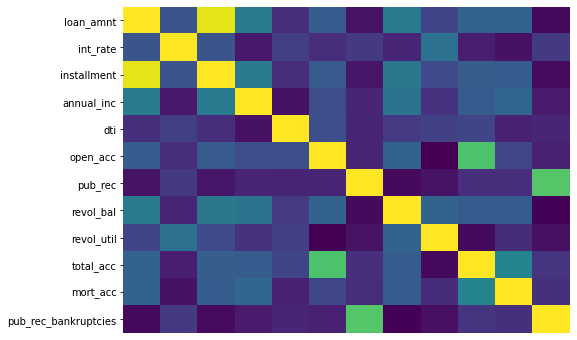

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cbar=False,xticklabels=False,cmap='viridis')

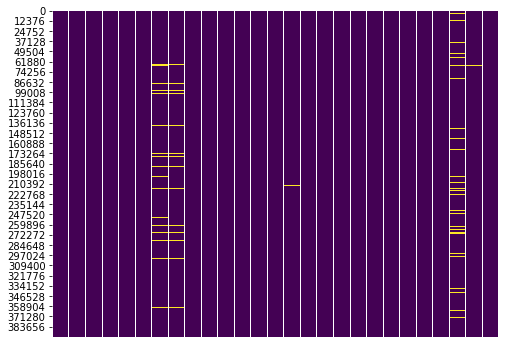

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),cbar=False,xticklabels=False,cmap='viridis')

In [7]:
def fet_info(st):
  return df_info[df_info['LoanStatNew']==st]['Description'].iloc[0]

In [ ]:
fet_info('dti')

'A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.'

In [ ]:
for element in df_info['LoanStatNew'].values:
  print(element,end='  :  ')
  print(fet_info(element))

loan_amnt  :  The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
term  :  The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate  :  Interest Rate on the loan
installment  :  The monthly payment owed by the borrower if the loan originates.
grade  :  LC assigned loan grade
sub_grade  :  LC assigned loan subgrade
emp_title  :  The job title supplied by the Borrower when applying for the loan.*
emp_length  :  Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 
home_ownership  :  The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER
annual_inc  :  The self-reported annual income provided by the borrower during registration.
verification_status  :  Indicates if

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

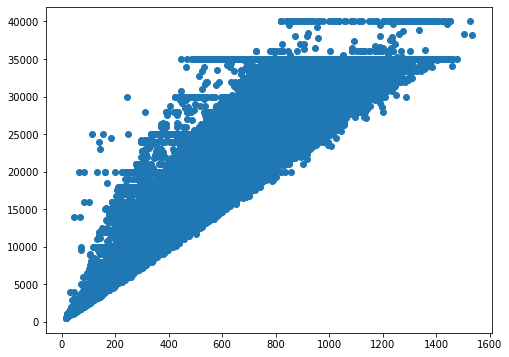

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(data=df,x='installment',y='loan_amnt')

In [ ]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [ ]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [ ]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [ ]:
fet_info('grade')

'LC assigned loan grade'

In [ ]:
fet_info('sub_grade')

'LC assigned loan subgrade'

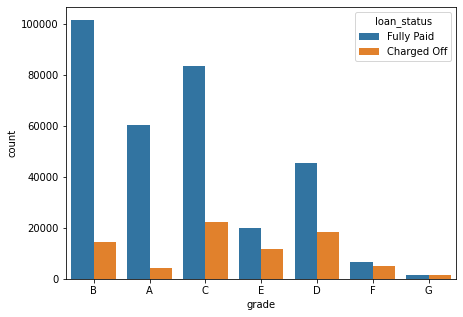

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='grade',hue='loan_status',data=df)

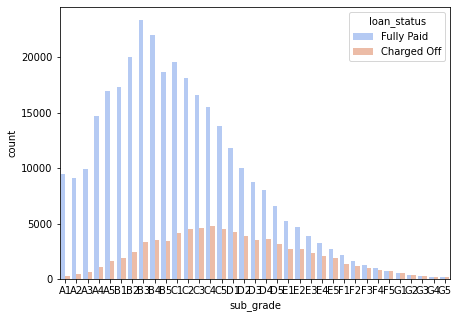

In [ ]:
plt.figure(figsize=(7,5))
subgrade_order=sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',hue='loan_status',data=df,order=subgrade_order,palette='coolwarm')

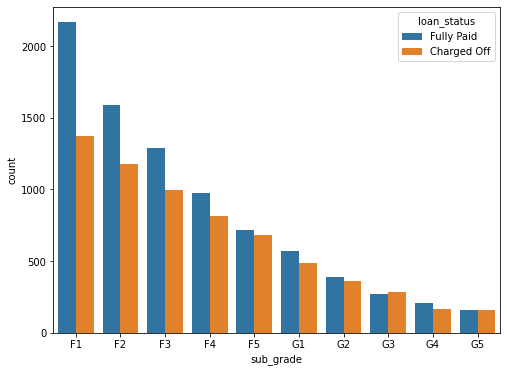

In [ ]:
f_and_g_df=df[(df['grade']=='G')| (df['grade']=='F')]
plt.figure(figsize=(8,6))
subgrade_order=sorted(f_and_g_df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g_df,hue='loan_status',order=subgrade_order)

In [8]:
df['loan_status']=df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [9]:
df['loan_status'].unique()

array([1, 0])

In [ ]:
len(df)

396030

In [ ]:
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [ ]:
fet_info('emp_title')

'The job title supplied by the Borrower when applying for the loan.*'

In [ ]:
df['emp_title'].nunique()

173105

In [10]:
df.drop('emp_title',axis=1,inplace=True)

In [ ]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,1,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,1,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,1,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,1,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,0,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [11]:
df['term']=df['term'].apply(lambda term: int(term[:3]))

In [ ]:
df['title'].nunique()

48817

In [12]:
df.drop('title',axis=1,inplace=True)

In [13]:
df.drop('address',axis=1,inplace=True)

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,1,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0
1,8000.0,36,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,1,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0
2,15600.0,36,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,1,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0
3,7200.0,36,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,1,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0
4,24375.0,60,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,0,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0


In [ ]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
dtype: float64

In [ ]:
df['purpose'].nunique()

14

In [14]:
df.drop('purpose',axis=1,inplace=True)

In [ ]:
df['initial_list_status'].nunique()

2

In [ ]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [15]:
df['initial_list_status']=df['initial_list_status'].map({'w':1,'f':0})
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,1,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,1,INDIVIDUAL,0.0,0.0
1,8000.0,36,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,1,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,0,INDIVIDUAL,3.0,0.0
2,15600.0,36,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,1,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0,INDIVIDUAL,0.0,0.0
3,7200.0,36,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,1,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0,INDIVIDUAL,0.0,0.0
4,24375.0,60,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,0,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,0,INDIVIDUAL,1.0,0.0


In [ ]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [16]:
df['verification_status']=df['verification_status'].map({'Not Verified':0, 'Source Verified':1, 'Verified':2})

In [ ]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,B,B4,10+ years,RENT,117000.0,0,Jan-2015,1,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,1,INDIVIDUAL,0.0,0.0
1,8000.0,36,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,0,Jan-2015,1,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,0,INDIVIDUAL,3.0,0.0
2,15600.0,36,10.49,506.97,B,B3,< 1 year,RENT,43057.0,1,Jan-2015,1,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0,INDIVIDUAL,0.0,0.0
3,7200.0,36,6.49,220.65,A,A2,6 years,RENT,54000.0,0,Nov-2014,1,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0,INDIVIDUAL,0.0,0.0
4,24375.0,60,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,2,Apr-2013,0,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,0,INDIVIDUAL,1.0,0.0


In [ ]:
df['home_ownership'].nunique()

6

In [ ]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [17]:
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])
df['earliest_cr_line']=df['earliest_cr_line'].apply(lambda term: term.year)

In [ ]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

In [18]:
df['application_type']=df['application_type'].map({'INDIVIDUAL':0, 'JOINT':1, 'DIRECT_PAY':2})

In [20]:
df.groupby('loan_status')['emp_length'].value_counts()

loan_status  emp_length
0            10+ years      23215
             2 years         6924
             < 1 year        6563
             3 years         6182
             1 year          5154
             5 years         5092
             4 years         4608
             7 years         4055
             6 years         3943
             8 years         3829
             9 years         3070
1            10+ years     102826
             2 years        28903
             3 years        25483
             < 1 year       25162
             5 years        21403
             1 year         20728
             4 years        19344
             6 years        16898
             7 years        16764
             8 years        15339
             9 years        12244
Name: emp_length, dtype: int64

In [21]:
df.drop('emp_length',axis=1,inplace=True)

In [22]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
dtype: float64

In [24]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [25]:
def fill_mort_acc(total_acc,mort_acc):
  if np.isnan(mort_acc):
    return total_acc_avg[total_acc]
  else: return mort_acc

In [26]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [27]:
df=df.dropna()

In [31]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
dtype: int64

In [32]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,B,B4,RENT,117000.0,0,Jan-2015,1,26.24,1990,16.0,0.0,36369.0,41.8,25.0,1,0,0.0,0.0
1,8000.0,36,11.99,265.68,B,B5,MORTGAGE,65000.0,0,Jan-2015,1,22.05,2004,17.0,0.0,20131.0,53.3,27.0,0,0,3.0,0.0
2,15600.0,36,10.49,506.97,B,B3,RENT,43057.0,1,Jan-2015,1,12.79,2007,13.0,0.0,11987.0,92.2,26.0,0,0,0.0,0.0
3,7200.0,36,6.49,220.65,A,A2,RENT,54000.0,0,Nov-2014,1,2.60,2006,6.0,0.0,5472.0,21.5,13.0,0,0,0.0,0.0
4,24375.0,60,17.27,609.33,C,C5,MORTGAGE,55000.0,2,Apr-2013,0,33.95,1999,13.0,0.0,24584.0,69.8,43.0,0,0,1.0,0.0


In [33]:
df.drop('grade',inplace=True,axis=1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [34]:
df.drop('issue_d',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,0,1,26.24,1990,16.0,0.0,36369.0,41.8,25.0,1,0,0.0,0.0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,0,1,22.05,2004,17.0,0.0,20131.0,53.3,27.0,0,0,3.0,0.0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,1,1,12.79,2007,13.0,0.0,11987.0,92.2,26.0,0,0,0.0,0.0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,0,1,2.60,2006,6.0,0.0,5472.0,21.5,13.0,0,0,0.0,0.0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,2,0,33.95,1999,13.0,0.0,24584.0,69.8,43.0,0,0,1.0,0.0


In [36]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'ANY', 'NONE'], dtype=object)

In [38]:
df1=pd.get_dummies(data=df,drop_first=True)
df1.head()

,loan_amnt,term,int_rate,installment,annual_inc,verification_status,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,sub_grade_A2,sub_grade_A3,sub_grade_A4,sub_grade_A5,sub_grade_B1,sub_grade_B2,sub_grade_B3,sub_grade_B4,sub_grade_B5,sub_grade_C1,sub_grade_C2,sub_grade_C3,sub_grade_C4,sub_grade_C5,sub_grade_D1,sub_grade_D2,sub_grade_D3,sub_grade_D4,sub_grade_D5,sub_grade_E1,sub_grade_E2,sub_grade_E3,sub_grade_E4,sub_grade_E5,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,329.48,117000.0,0,1,26.24,1990,16.0,0.0,36369.0,41.8,25.0,1,0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,8000.0,36,11.99,265.68,65000.0,0,1,22.05,2004,17.0,0.0,20131.0,53.3,27.0,0,0,3.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,1,1,12.79,2007,13.0,0.0,11987.0,92.2,26.0,0,0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,7200.0,36,6.49,220.65,54000.0,0,1,2.60,2006,6.0,0.0,5472.0,21.5,13.0,0,0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,24375.0,60,17.27,609.33,55000.0,2,0,33.95,1999,13.0,0.0,24584.0,69.8,43.0,0,0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [39]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [48]:
X=df1.drop('loan_status',axis=1)
y=df1['loan_status']
len(df)

395219

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.1)

In [50]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [54]:
X_train.shape

(355697, 56)

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [56]:
model=Sequential()

model.add(Dense(56,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(28,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(14,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [57]:
model.fit(X_train,y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Epoch 1/25
1390/1390 [==============================] - 4s 2ms/step - loss: 0.4938 - val_loss: 0.4580
Epoch 2/25
1390/1390 [==============================] - 3s 2ms/step - loss: 0.4557 - val_loss: 0.4559
Epoch 3/25
1390/1390 [==============================] - 3s 2ms/step - loss: 0.4564 - val_loss: 0.4556
Epoch 4/25
1390/1390 [==============================] - 3s 2ms/step - loss: 0.4518 - val_loss: 0.4550
Epoch 5/25
1390/1390 [==============================] - 3s 2ms/step - loss: 0.4529 - val_loss: 0.4539
Epoch 6/25
1390/1390 [==============================] - 4s 3ms/step - loss: 0.4502 - val_loss: 0.4537
Epoch 7/25
1390/1390 [==============================] - 4s 3ms/step - loss: 0.4503 - val_loss: 0.4538
Epoch 8/25
1390/1390 [==============================] - 3s 2ms/step - loss: 0.4523 - val_loss: 0.4531
Epoch 9/25
1390/1390 [==============================] - 3s 2ms/step - loss: 0.4493 - val_loss: 0.4549
Epoch 10/25
1390/1390 [==============================] - 3s 2ms/step - loss: 0.448

In [58]:
loss_df=pd.DataFrame(model.history.history)
loss_df.head()

,loss,val_loss
0,0.472104,0.457954
1,0.457207,0.455921
2,0.454356,0.455584
3,0.452794,0.455028
4,0.452319,0.453881


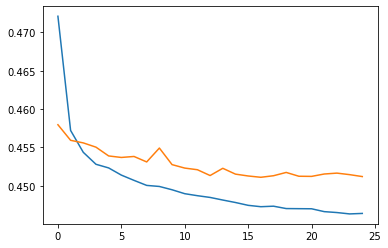

In [59]:
plt.plot(loss_df)

In [66]:
predictions=model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [68]:
print('Confusion Matrics :\n',confusion_matrix(y_test,predictions))
print('\n')
print('Classification report : \n',classification_report(y_test,predictions))
print('\n')
print('Accuracy of model : \n', accuracy_score(y_test,predictions))

Confusion Matrics :
 [[  265  7593]
 [  188 31476]]


Classification report : 
               precision    recall  f1-score   support

           0       0.58      0.03      0.06      7858
           1       0.81      0.99      0.89     31664

    accuracy                           0.80     39522
   macro avg       0.70      0.51      0.48     39522
weighted avg       0.76      0.80      0.73     39522



Accuracy of model : 
 0.8031223116239057
